# Preprocessing

In [21]:
import pandas as pd
import os

# Define the directory paths
clickedObj_dir = 'twoEnglishWords_bold/clickedObj/'
game_properties_dir = 'twoEnglishWords_bold/game_properties/'
message_dir = 'twoEnglishWords_bold/message/'

# Function to process and update the CSV files
def process_csv_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            print('Processing file:', filepath)
            df = pd.read_csv(filepath)
            
            # Concatenate 'gameid' and 'roundNum' columns
            df['gameid_roundNum'] = df['gameid'].astype(str) + '_' + df['roundNum'].astype(str)

            # Suppress the 'gameid' and 'roundNum' columns and reorder the columns in order to put 'gameid_roundNum' at the beginning
            df = df[['gameid_roundNum'] + [col for col in df.columns if col not in ['gameid', 'roundNum', 'gameid_roundNum']]] 
            
            # Save the updated data back to CSV
            df.to_csv(filepath, index=False)

# Process the CSV files in clickedObj directory
process_csv_files(clickedObj_dir)

# Process the CSV files in game_properties directory
process_csv_files(game_properties_dir)

# Process the CSV files in message directory
process_csv_files(message_dir)


Processing file: twoEnglishWords_bold/clickedObj/2017-10-12-7-16-54-962_4902-b8d5c1cd-85c7-4c3a-8a17-8ecc92320fb4.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-30-21-44-29-352_6481-ba363939-3225-4e2a-b862-d4e4d1c9248b.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-10-12-8-17-20-114_6907-385a40bb-968d-4065-a5fe-102df0e19a8e.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-30-21-37-49-535_4607-d56eead7-e924-4caa-ad50-4250b075bb8c.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-10-12-7-0-26-855_2143-6d00afdb-59a1-42ae-b434-b9d6aa44acad.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-22-19-45-13-378_0311-1004ba6e-1324-4c16-a1c7-98376d5eb8b0.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-29-3-28-11-920_2727-750fae38-d287-41d8-89e3-90da13485fe7.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-29-3-31-20-940_3225-4e49eae3-2f46-4f1b-8a0a-226be27ae25b.csv
Processing file: twoEnglishWords_bold/clickedObj/2017-9-30-

In [22]:
import os
import pandas as pd

# Define the directory paths
clickedObj_dir = 'twoEnglishWords_bold/clickedObj/'
game_properties_dir = 'twoEnglishWords_bold/game_properties/'
message_dir = 'twoEnglishWords_bold/message/'

# Function to join all files in a directory and create a unique file
def join_files(directory, output_file):
    # Get all file paths in the directory
    file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.csv')]
    
    # Read and concatenate all files
    dfs = [pd.read_csv(file_path) for file_path in file_paths]
    concatenated_df = pd.concat(dfs)
    
    # Save the concatenated data to a new file
    concatenated_df.to_csv(output_file, index=False)
    print(f"Joined files in {directory} and saved to {output_file}")

# Join files in clickedObj directory
join_files(clickedObj_dir, os.path.join(clickedObj_dir, 'clickedObj_all.csv'))

# Join files in game_properties directory
join_files(game_properties_dir, os.path.join(game_properties_dir, 'clickedObj_all.csv'))

# Join files in message directory
join_files(message_dir, os.path.join(message_dir, 'clickedObj_all.csv'))


Joined files in twoEnglishWords_bold/clickedObj/ and saved to twoEnglishWords_bold/clickedObj/clickedObj_all.csv
Joined files in twoEnglishWords_bold/game_properties/ and saved to twoEnglishWords_bold/game_properties/clickedObj_all.csv
Joined files in twoEnglishWords_bold/message/ and saved to twoEnglishWords_bold/message/clickedObj_all.csv


# Analysis

The 4512 top 12 words represent 73.64% of the 6127 total words.


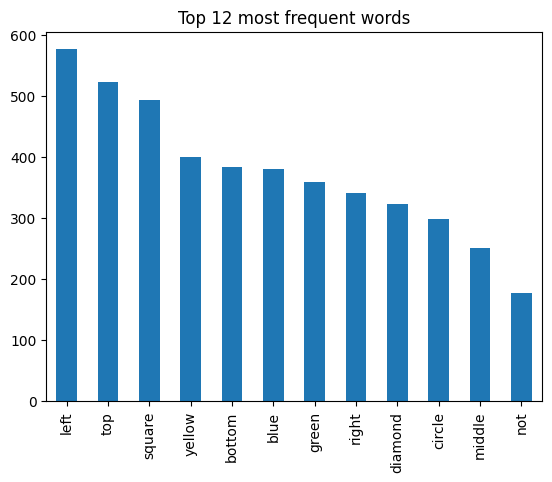

The 1651 top 30 messages represent 48.47% of the 3406 total messages.


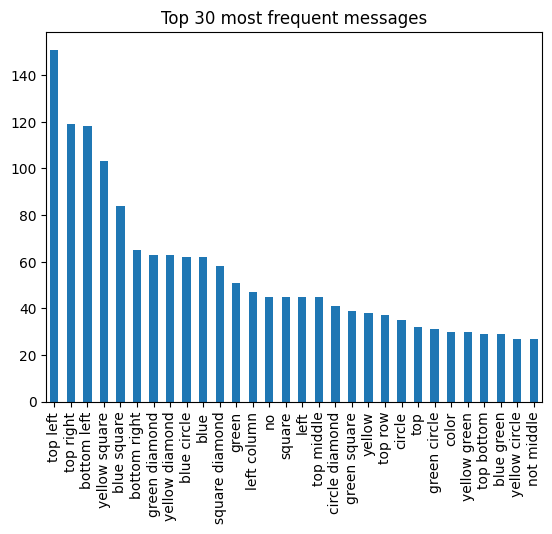

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('data/message_all.csv')

# Split the messages into individual words
words = df['contents'].str.split()
messages = df['contents']

# Flatten the list of words
words_flat = [word.lower() for sublist in words for word in sublist]
messages_flat = [message.lower() for message in messages]

# Count the frequency of each word
word_counts = pd.Series(words_flat).value_counts()
message_counts = pd.Series(messages_flat).value_counts()

# Compute the total number of words
total_words = len(words_flat)
proportion_12 = word_counts[:12].sum() / total_words
print(f"The {word_counts[:12].sum()} top 12 words represent {proportion_12:.2%} of the {total_words} total words.")

# Plot the word frequencies
word_counts[:12].plot(kind='bar')
plt.title('Top 12 most frequent words')
plt.show()

# Compute the total number of messages
total_messages = len(messages_flat)
proportion_30 = message_counts[:30].sum() / total_messages
print(f"The {message_counts[:30].sum()} top 30 messages represent {proportion_30:.2%} of the {total_messages} total messages.")

# Plot the message frequencies 
message_counts[:30].plot(kind='bar')
plt.title('Top 30 most frequent messages')
plt.show()

There are slight differences with the plots from the original paper, we don't know where they come from.

# Clean the data to keep only the 12 most frequent words (see first plot above) and turn the "no ..." into "not ..."

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('data/message_all.csv')
words = df['contents'].str.split()
words_flat = [word.lower() for sublist in words for word in sublist]
word_counts = pd.Series(words_flat).value_counts()

# Get all the games for which all messages contain either one of the 12 most used words or 'yes' or 'no'
words_kept = set(word_counts[:12].index.union({"no"}))
games_to_keep = set()
for gameid in df['gameid_roundNum'].unique():
    game_df = df[df['gameid_roundNum'] == gameid]
    messages = game_df['contents'].str.lower()
    if any(message=="no" or any(word not in words_kept for word in message.split(" ")) for message in messages):
        continue
    else:
        games_to_keep.add(gameid)

print("Number of games to keep:", len(games_to_keep))

# Remove the games from all dataframes
names = ['clickedObj', 'game_properties', 'message']
for name in names:
    df = pd.read_csv('data/' + name + '_all.csv')
    df = df[df['gameid_roundNum'].isin(games_to_keep)]
    df.to_csv('data/' + name + '_cleaned.csv', index=False)

# Read the CSV files
df = pd.read_csv('data/message_cleaned.csv')
for row, message in enumerate(df['contents']):
    message = message.lower()
    if 'no' in message:
        words = message.split(' ')
        if words[0] == 'no':
            words[0] = 'not'
            message = ' '.join(words)
    df.at[row, 'contents'] = message
df.to_csv('data/message_cleaned.csv', index=False)


Number of games to keep: 846


# Analysis

In [2]:
import pandas as pd

# Read the CSV file
df_message = pd.read_csv('data/message_cleaned.csv')
df_clickedObj = pd.read_csv('data/clickedObj_cleaned.csv')
df_games = pd.read_csv('data/game_properties_cleaned.csv')

print("message_cleaned's different game_ids:", len(df_message['gameid_roundNum'].unique()))
print("clickedObj_cleaned's different game_ids:", len(df_clickedObj['gameid_roundNum'].unique()))
print("game_properties_cleaned's different game_ids:", len(df_games['gameid_roundNum'].unique()))

message_cleaned's different game_ids: 846
clickedObj_cleaned's different game_ids: 835
game_properties_cleaned's different game_ids: 762


# Some of the scenarios are not present in all the dataframes. We keep only the scenarios that are present in all the dataframes.

In [3]:
message_unique = set(df_message['gameid_roundNum'].unique())
games_unique = set(df_games['gameid_roundNum'].unique())
clickedObj_unique = set(df_clickedObj['gameid_roundNum'].unique())

# Remove the games that are not in all dataframes
games_to_keep = message_unique.intersection(games_unique).intersection(clickedObj_unique)
print("Number of games to keep:", len(games_to_keep))

# Remove the games from all dataframes
df_message = df_message[df_message['gameid_roundNum'].isin(games_to_keep)]
df_clickedObj = df_clickedObj[df_clickedObj['gameid_roundNum'].isin(games_to_keep)]
df_games = df_games[df_games['gameid_roundNum'].isin(games_to_keep)]

# Save the cleaned dataframes
df_message.to_csv('data/message_cleaned.csv', index=False)
df_clickedObj.to_csv('data/clickedObj_cleaned.csv', index=False)
df_games.to_csv('data/game_properties_cleaned.csv', index=False)

Number of games to keep: 752


# Some games have the same id but correspond to different realities. We rename the second game by adding a "_bis" at the end of the id.

In [ ]:
import pandas as pd

# Read the cleaned game properties dataframe
df_games = pd.read_csv('data/game_properties_cleaned.csv')

# Find the duplicate game ids
duplicate_ids = df_games['gameid_roundNum'].duplicated(keep=False)

# Rename the second game by adding "_bis" at the end of the id
df_games.loc[duplicate_ids, 'gameid_roundNum'] += '_bis'

# Save the updated dataframe
df_games.to_csv('data/game_properties_cleaned.csv', index=False)


# In order to have a fixed lexicon, we change the game_properties dataset in order for the objective to always be to find the (A,1) pair.

In [8]:
import pandas as pd

# Read the cleaned game properties dataframe
df_games = pd.read_csv('data/game_properties_cleaned.csv')
df_games["goal"][0]

A


In [16]:
import pandas as pd
import random

chars = {'A', 'B', 'C'}
nums = {1, 2, 3}

# Read the cleaned game properties dataframe
df_games = pd.read_csv('data/game_properties_cleaned.csv')

for gameid in df_games['gameid_roundNum'].unique():
    chars = {'A', 'B', 'C'}
    nums = {1, 2, 3}    
    game_df = df_games[df_games['gameid_roundNum'] == gameid]
    goal_object = game_df[game_df["goal"]==1]
    prev_char, prev_num = goal_object["char"].values[0], goal_object["num"].values[0]
    if prev_char != 'A':
        for row in game_df.index:
            if game_df.at[row, 'char'] == prev_char:
                df_games.at[row, 'char'] = 'A'
            elif game_df.at[row, 'char'] == 'A':
                df_games.at[row, 'char'] = prev_char
    
    if prev_num != 1:
        for row in game_df.index:
            if game_df.at[row, 'num'] == prev_num:
                df_games.at[row, 'num'] = 1
            elif game_df.at[row, 'num'] == 1:
                df_games.at[row, 'num'] = prev_num

# Save the updated dataframe
df_games.to_csv('data/game_properties_cleaned.csv', index=False)